# Rapport de projet - Modélisation et Résolution de problème 

Enseignant : M.HARISPE Sébatien

Auteurs : M.DARDAILLON Enzo, M.DELFINO Clément

## Sommaire
1. [Introduction](#Introduction)
2. [Présentation du projet](#Présentation-du-projet)
3. [Exploration du jeu de données](#Exploration-du-jeu-de-données)
  1. [Analyse](#Analyse)
  2. [Nettoyage](#Nettoyage)
4. [Modélisation](#Modélisation)
  1. [Modélisation du problème](#Modélisation-du-problème)
  2. [Définition de la méthodologie](#Définition-de-la-méthodologie)
5. [Implémentation](#Implémentation)
6. [Résultats](#Résultats)
  2. [Pour aller plus loin](#Pour-aller-plus-loin)
7. [Conclusion](#Conclusion)

## Introduction
Ce document fait référence au projet du cours Modélisation et Résolution de problème à l'IMT Mines Alès. Lors des sessions de cours, les étudiants ont pu découvrir le domaine de l'Intelligence Artificiel (IA). Ce vaste sujet se divise en plusieurs sous-groupes. Dans le cadre de la formation, l'apprentissage supervisé a été étudié. Il s'agit d'une branche de l'apprentissage automatisé (Machine Learning en anglais). La technologie apprise consiste à prédire un résultat à partir d'un modèle complexe. Ce dernier s'est entrainé sur un jeu de données préparé à l'avance. C'est-à-dire que les données ont été nettoyée et préparé pour le développement de cette IA.

Les projets doivent être réalisés par groupe de deux à trois étudiants. Ce document est réalisé et rédigé par DARDAILLON Enzo et DELFINO Clément lors de la deuxième année d'école d'ingénieur (Promotion INFRES 14). Le livrable contient un fichier PDF ainsi qu'un fichier de type Jupyter.

## Présentation du projet
L'objectif de ce projet est de réaliser un algorithme d'apprentissage supervisé, sur un sujet libre, choisi par les étudiants. Ce rapport va s'intéresser à la reconnaissance d'une image. Le but est de trouver quel chiffre est contenu dans une image. Le format et les caractéristiques sont détaillés ultérieurement.

## Exploration du jeu de données
Le dataset utilisé fait partie de la bibliothèque de [SciKit Learn](https://scikit-learn.org/stable/index.html). Cet outil propose plusieurs ensembles de données. Nous allons nous pencher sur le jeu de donnée contenant des images de chiffres [(sklearn.datasets.load_digits)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). Initialement, ces données proviennent [des recherches de l'Université de Californie à Irvine (UCI)](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).
### Analyse
L'analyse du jeu de données est utile pour en connaître davantage sur la marche à suivre.

#### Format des données

In [45]:
from sklearn.datasets import load_digits
import numpy as np

digits = load_digits()

shape = digits.data.shape
nb_images = shape[0]
nb_pixels_by_image = shape[1]
image_dimension = int(np.sqrt(shape[1]))

print("Les données sont contenues dans une matrice de dimension: {}".format(shape))
print("Cette matrice comporte donc {} images comportant {} pixels.".format(nb_images, nb_pixels_by_image))
print("On peut en déduire que le format des images est {}x{}.".format(image_dimension, image_dimension))

Les données sont contenues dans une matrice de dimension: (1797, 64)
Cette matrice comporte donc 1797 images comportant 64 pixels.
On peut en déduire que le format des images est 8x8.


#### Étendue des valeurs de pixels

In [46]:
min_pixel_value = np.amin(digits.data)
max_pixel_value = np.amax(digits.data)

print("Valeur minimum d'un pixel (noir): {}".format(min_pixel_value))
print("Valeur maximum d'un pixel (blanc): {}".format(max_pixel_value))

Valeur minimum d'un pixel (noir): 0.0
Valeur maximum d'un pixel (blanc): 16.0


#### Représentation des données sous forme de tableau
* Chaque lignes représentent une image.
* Chaque colonnes représentent un pixel d'image.

In [47]:
import pandas as pd

data_frame = pd.DataFrame(digits.data, columns=digits.feature_names)
data_frame

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


#### Affichage d'une image

Voici une image représentant un 3


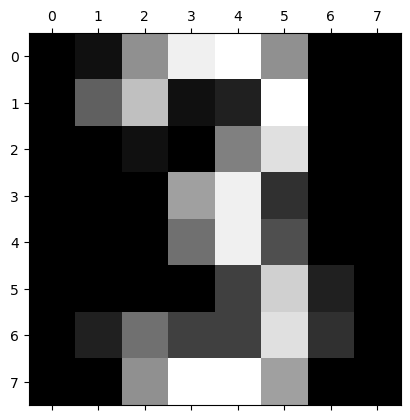

In [48]:
import matplotlib.pyplot as plt

# Sélection aléatoire d'une image
id_image = np.random.randint(len(digits.target))

print("Voici une image représentant un {}".format(digits.target[id_image]))

plt.matshow(digits.images[id_image])
plt.show()

#### Affichage de plusieurs images

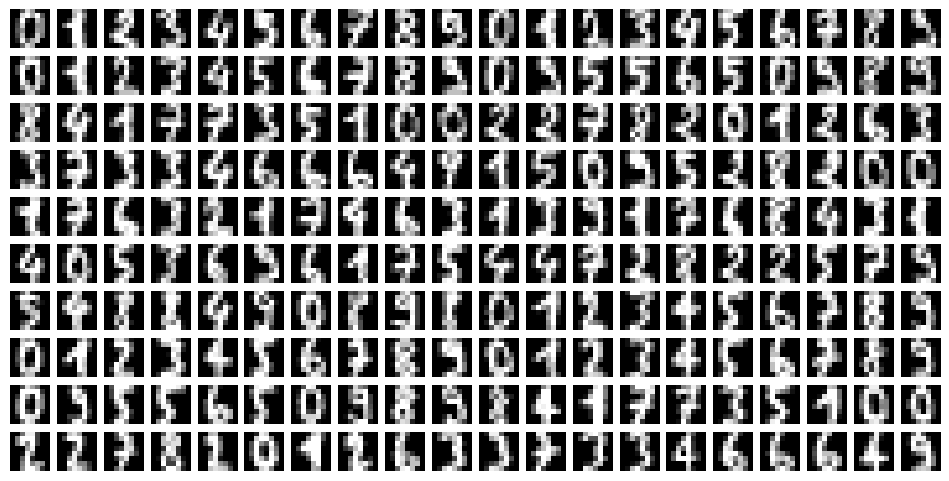

In [49]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()

fig, axs = plt.subplots(nrows=10, ncols=20, figsize=(12, 6))
for idx, ax in enumerate(axs.flatten()):
    ax.axis("off")
    ax.matshow(digits.images[idx])

### Nettoyage
Cette partie consiste à vérifier la propreté des données. Il s'agit de vérifier si les données que nous possédons sont utilisables.

<div class="alert alert-warning">
    <b>Il existe 6 principales caractéristiques d&apos;une donnée propre :</b><br>
    <ol>
        <li><b>Complétude</b>: Est-ce qu'il existe des valeurs null ?</li>
        <li><b>Conformité</b>: Est-ce que les valeurs sont toutes dans le même format ?</li>
        <li><b>Cohérence</b>: Est-ce que des valeurs rentrent en conflit ?</li>
        <li><b>Exactitude</b>: Est-ce que des valeurs sont périmées ?</li>
        <li><b>Duplication</b>: Existe-t-il des doublons ?</li>
        <li><b>Intégrité</b>: Les données sont-elles vérifiables et référencée ?</li>
    </ol>
</div>

Dans le cas de ce projet, seuls les caractéristiques de Complétude et Conformité sont pertinentes à vérifier.

#### Complétude
Un simple parcourt du tableau permet de savoir s'il existe des valeurs *null*

En python, les valeurs *null* sont représentées par un type *None*

In [50]:
for i in range(len(digits.data)):
    for j in range(len(digits.data[i])):
        value_type = type(digits.data[i][j])
        if (value_type is None):
            print("null value at ({}, {})".format(i, j))

<div class="alert alert-success">
    Rien est affiché, nous avons donc des données <b>complètes</b> !
</div>

#### Conformité
Par analyse du tableau ci-dessus, on considère que la première valeur est du bon type.

Cherchons donc le type de variable de la première valeur :

In [51]:
type(digits.data[0][0])

numpy.float64

Il nous suffit de vérifier si toutes les valeurs correspondent bien avec le type *numpy.float64*

Avec le code ci-dessous, on parcourt toute la matrice de données et on affiche une valeur si elle est différente de *numpy.float64*

In [52]:
target_type = type(digits.data[0][0])

for i in range(len(digits.data)):
    for j in range(len(digits.data[i])):
        value_type = type(digits.data[i][j])
        if (value_type != target_type):
            print("Wrong value at ({}, {})".format(i, j))

<div class="alert alert-success">
    Rien est affiché, nous avons donc des données <b>conformes</b> !
</div>

## Modélisation

<div class="alert alert-warning">
    <b>L'apprentissage supervisé comporte plusieurs familles d'algorithme.</b><br>
    Lors de la formation, deux ont été développés :
    <ul>
        <li><b>La régression</b>: permet de prédire une valeur dans un monde continu.</li>
        <li><b>La classification</b>: permet de catégoriser des valeurs.</li>
    </ul>
</div>

### Modélisation du problème

#### Entrée
L'[analyse de notre jeu de données](#Analyse) nous permet de s'avoir que l'entrée de notre modèle est une liste d'array de taille 64.<br>
Chaque élément d'une array est un pixel traduit d'une nuance de gris allant de 0 à 16.
\begin{equation*}
\mathcal{X} = \mathbb{N}^{64} \in [0, 16]
\end{equation*}
#### Sortie
En sortie de notre prédiction, nous souhaitons connaître le chiffre contenu dans chaque image.<br>
La valeur de retour est un chiffre entre 0 et 9.<br>
Cette valeur est discontinue :
\begin{equation*}
\mathcal{Y} = \mathbb{N} \in [0, 9]
\end{equation*}
#### Choix de l'algorithme
On souhaite donc **classer** chaque entrée $\mathcal{X}$ en 10 groupes.<br>
<div class="alert alert-success">
    L'algorithme le plus approprié pour résoudre notre problème est <b>la classification</b> !
</div>

### Définition de la méthodologie

La méthodologie est importante à décider en amont de l'implémentation. Il serait impensable de batir un immeuble sans plan. Il en va de même pour le machine learning.

Faisons un inventaire de nos connaissances utiles afin établir notre plan d'action.<br>
Nous connaissons:
- Nos entrées `X = digits.data`
- Notre sortie cible `y = digits.target`
- Le type d'apprentissage à mettre en place `Classification Linéaire`

Il nous reste à trouver:
1. L'utilitaire de SciKit Learn nous permettant de mettre en place cette classification
2. Une ou plusieurs méthodes de validation du modèle

#### 1. Utilitaire SciKit Learn
La bibliothèque SciKit propose plusieurs outils de classification tels que *Passive Aggressive Classifier*, *Linear perceptron classifier* et *Logistic Regression*.

Notre choix s'est premièrement porté sur des technologies employées lors des travaux pratiques : *Linear perceptron classifier* ou *Logistic Regression*.

Deuxièmement, le *perceptron* ne propose que deux sorties $\mathbb{Y}$. Or, notre modèle doit posséder un panel de 10 sorties différentes.

<div class="alert alert-success">
    Notre choix s'est donc tourné vers la <b>Logistic Regression</b> !
</div>

#### 2. Méthode de validation du modèle

En classification il existe plusieurs évaluateurs de modèles :
- Accuracy: Combien a-t-on de bonnes réponses sur l'ensemble des prédictions ?
- Precision: Sur tous les éléments positifs, combien sont corrects ?
- Recall: Sur l'ensemble de positif réels, combien ont été détecté comme positif ?
- F-measure: Cette fonction est correcte pour des sorties binaires, ce qui n'est pas le cas de notre modèle.

Comme notre jeu de données n'est pas très gros, toutes ces valeurs devraient être assez proches.
Ici, nous nous intéresserons surtout à la mesure `accuracy`.

## Implémentation

Initialisons les valeurs de notre modèle.

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# les entrées
X = digits.data

# les valeurs cibles
y = digits.target

# séparons les données d'apprentissages des données de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Initialisation du LogisticRegressor

In [54]:
# train a logistic regression model
regressor = LogisticRegression(max_iter=50000)
regressor.fit(X_train, y_train)

LogisticRegression(max_iter=50000)

Prédiction

In [55]:
# make predictions on the test set
y_pred = regressor.predict(X_test)

Évaluation du modèle

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# evaluate the model's performance
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Pour que le modèle soit efficace, chaque valeurs doivent être proche de 1.0")
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)

Pour que le modèle soit efficace, chaque valeurs doivent être proche de 1.0
Accuracy: 0.9722222222222222
Precision: 0.9735814591088425
Recall: 0.9743702791014647
F1-score: 0.9738640962411946


Affichage des mauvaises prédictions

<Figure size 640x480 with 0 Axes>

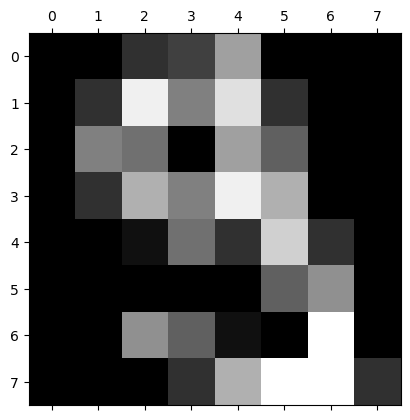

Prediction: 3 Target: 9


<Figure size 640x480 with 0 Axes>

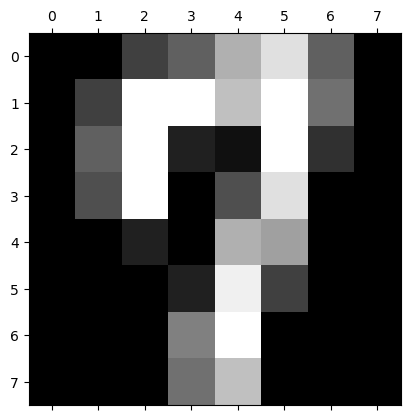

Prediction: 5 Target: 7


<Figure size 640x480 with 0 Axes>

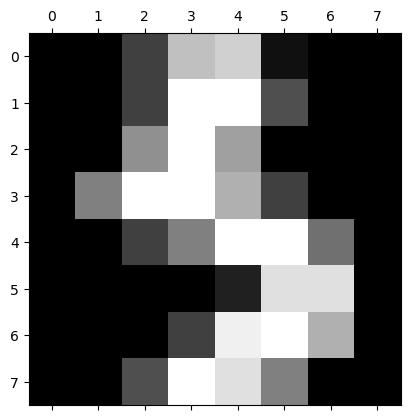

Prediction: 5 Target: 3


<Figure size 640x480 with 0 Axes>

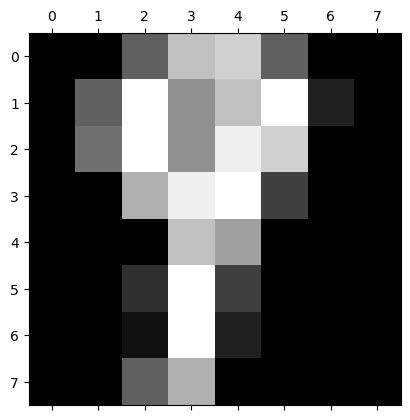

Prediction: 8 Target: 9


<Figure size 640x480 with 0 Axes>

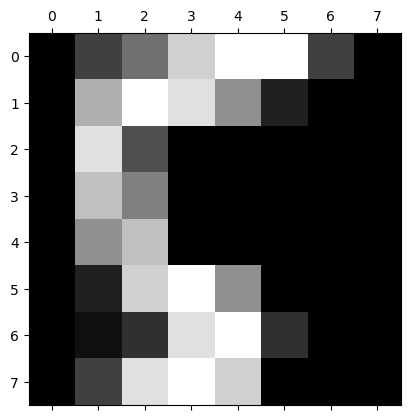

Prediction: 2 Target: 5


<Figure size 640x480 with 0 Axes>

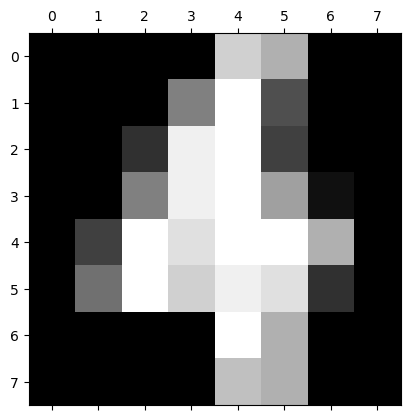

Prediction: 1 Target: 4


<Figure size 640x480 with 0 Axes>

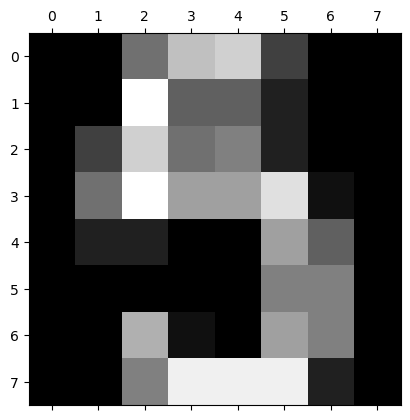

Prediction: 9 Target: 5


<Figure size 640x480 with 0 Axes>

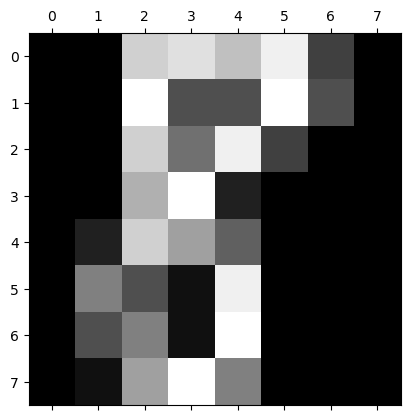

Prediction: 5 Target: 8


<Figure size 640x480 with 0 Axes>

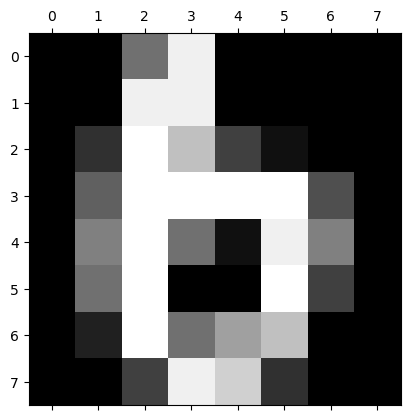

Prediction: 5 Target: 6


<Figure size 640x480 with 0 Axes>

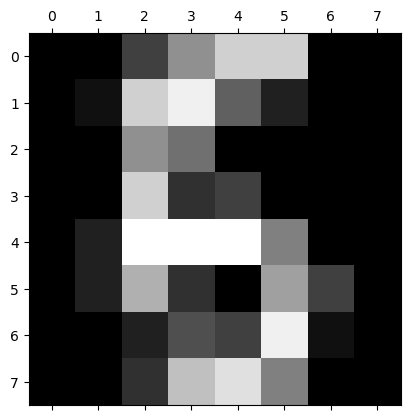

Prediction: 6 Target: 5


In [57]:
for false_image_index in range(len(y_pred)):
    if (y_pred[false_image_index] != y_test[false_image_index]):
        plt.gray()
        plt.matshow(np.reshape(X_test[false_image_index], (image_dimension, image_dimension)))
        plt.show()
        print("Prediction: {} Target: {}".format(y_pred[false_image_index], y_test[false_image_index]))

Affichage de bonnes prédictions<br>
Pour ne pas trop surcharger l'affichage, on décide d'afficher que les `nb_affichage` premières images/prédictions.

<Figure size 640x480 with 0 Axes>

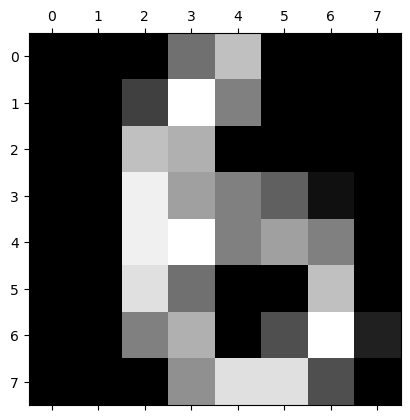

Prédiction: 6 Target: 6


<Figure size 640x480 with 0 Axes>

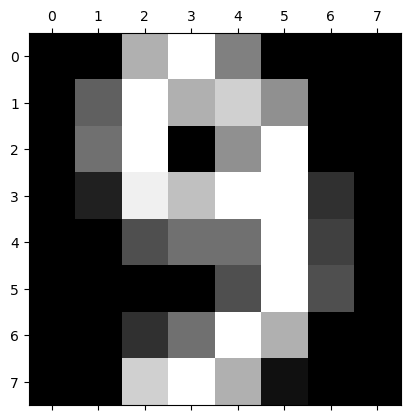

Prédiction: 9 Target: 9


<Figure size 640x480 with 0 Axes>

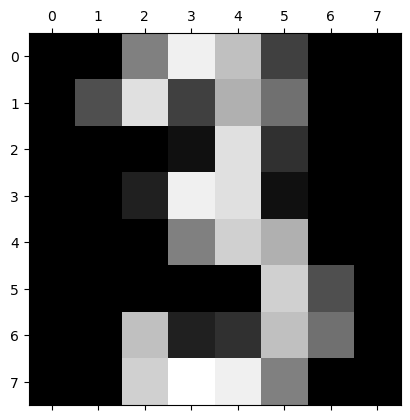

Prédiction: 3 Target: 3


<Figure size 640x480 with 0 Axes>

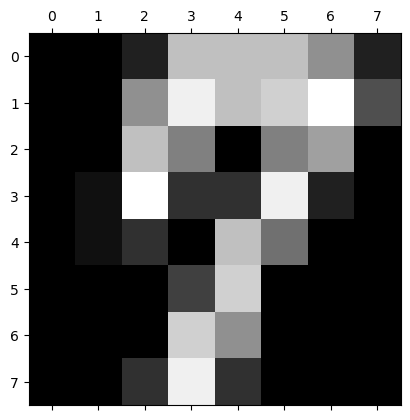

Prédiction: 7 Target: 7


<Figure size 640x480 with 0 Axes>

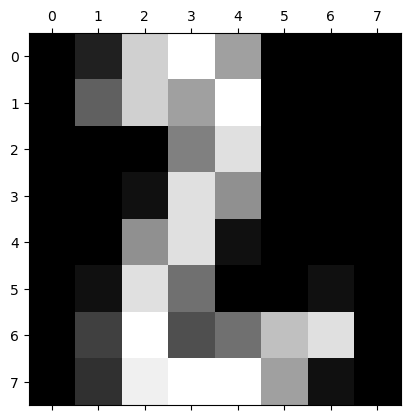

Prédiction: 2 Target: 2


<Figure size 640x480 with 0 Axes>

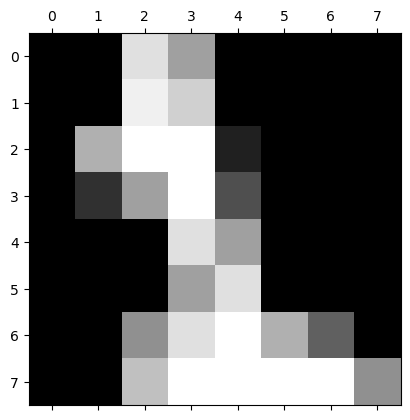

Prédiction: 1 Target: 1


<Figure size 640x480 with 0 Axes>

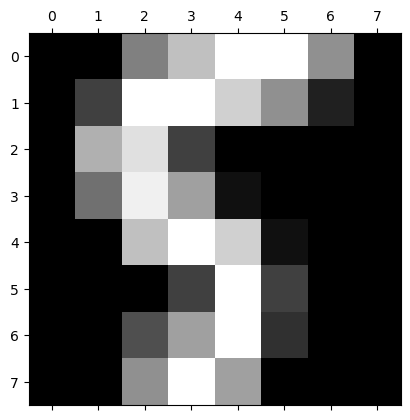

Prédiction: 5 Target: 5


<Figure size 640x480 with 0 Axes>

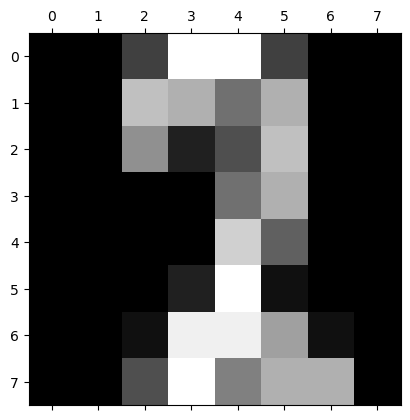

Prédiction: 2 Target: 2


<Figure size 640x480 with 0 Axes>

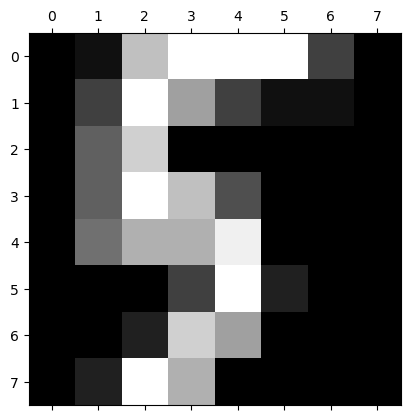

Prédiction: 5 Target: 5


<Figure size 640x480 with 0 Axes>

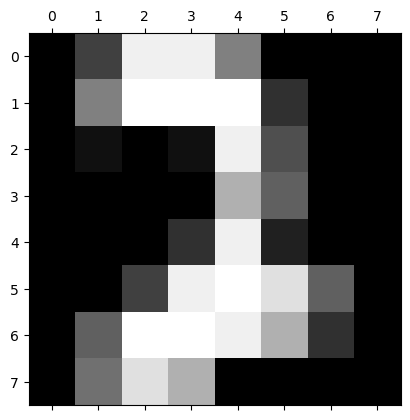

Prédiction: 2 Target: 2


In [58]:
nb_affichage = 10
for image_index in range(nb_affichage):
    plt.gray()
    plt.matshow(np.reshape(X_test[image_index], (image_dimension, image_dimension)))
    plt.show()
    print("Prédiction: {} Target: {}".format(y_pred[image_index], y_test[image_index]))

## Résultats

Avec une réussite d'environ 0.97, notre modèle est très satisfaisant.
En effet, nous avons pu l'entraîner sur plusieurs centaines d'images et cela se ressent dans nos résultats comme nous pouvons le constater ci-dessus.


In [59]:
print("Rappel des résultats")
print("Exactitude:", acc)
print("Précision:", prec)

Rappel des résultats
Exactitude: 0.9722222222222222
Précision: 0.9735814591088425


### Pour aller plus loin

Après ces très bons résultats, nous avons voulu aller plus loin.
En effet, nous nous sommes dit que cela serait encore plus impressionnant si notre modèle pouvait nous deviner le chiffre présent sur une image que nous avions nous même créée auparavant.

Pour ce faire, nous avons dessiné un chiffre sur un cadre 8x8 à l'aide d'un outil comme GIMP ou Photopea et nous avons ensuite exécuté le code suivant. Ce code lit l'image précédemment chargée pixel après pixel afin d'en définir le code RGB que nous ramenons ensuite à un chiffre de 0 à 16 conforme à ce que nous avons pu lire sur les matrices des images présentes dans le dataset.

In [60]:
from PIL import Image

img = Image.open('1.jpg')

pixels = []

for y in range(8):
    for x in range(8):
        r, g, b = img.getpixel((x, y))
        value = int((16*r)/256)
        pixels.append(value)

pixels = np.asarray(pixels)
print(pixels) 

[ 0  0  0  0  1  0  0  0  0  0  0  6 14  0  0  0  1  0  9  9 11  0  0  0
  0 10  3  0 11  0  0  0  0  2  0  0 10  1  0  0  0  0  0  0 10  0  0  0
  1  0  0  0  9  0  0  0  0  0  0  0  7  1  0  0]


In [61]:
prediction = regressor.predict(np.asmatrix(pixels))

#plt.matshow(np.asmatrix(pixels))
#plt.show()

print("Prediction: {}".format(prediction))

Prediction: [4]


/home/clement/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


<div class="alert alert-success">
    Nous pouvons voir que la prédiction n'est malheureusement pas la bonne...
    L'image représente un 1 et le modèle nous prédit un 4 et de même pour un 5 que nous avons aussi créé (présent également dans ce dossier) nous avons eu une mauvaise prédiction.
<div>

## Conclusion

<div class="alert alert-success">
    Nous avons réussi avec ces différents codes python, à obtenir un modèle très précis qui ne se trompe que très rarement.
    Cependant, ce modèle possède ses limites... En effet, le traitement de l'image en amont de la prédiction est très importante et il faut qu'il soit similaire à celui effectué sur les images du dataset pour que la prédiction soit bonne.
    Nous pensons que c'est à cause de cela que les prédictions sur les images créées par nos soins n'étaient pas les bonnes.
    Nous pensons aussi qu'un entraînement plus poussé sur des images créées par GIMP par exemple nous permettrait d'atteindre notre objectif. Cependant il faudrait créer énormément d'images assez différentes les unes des autres afin que le modèle soit puissant...
<div>